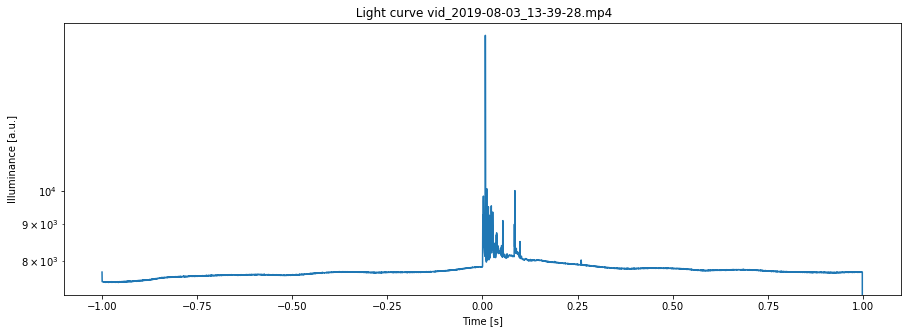

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

for f in glob.iglob("./data/*.mp4"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')

        b = np.zeros(5998)

        cap = cv2.VideoCapture(f)

        count = 0
        while True:
            ret,frame = cap.read()
            if (not ret):
                break
            crop_img = frame[0:320, 0:1024]
            b[count] = crop_img.ravel().sum() / 6000
            cv2.imshow('window-name',crop_img)
            count = count + 1
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break       

        cap.release()
        cv2.destroyAllWindows()  # destroy all the opened windows

        plt.figure(figsize=(15,5))
        plt.plot(np.linspace(-0.999,0.999,5998),b)
        plt.yscale('log')
        plt.title(' Light curve ' + s[len(s)-1])
        plt.xlabel('Time [s]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass


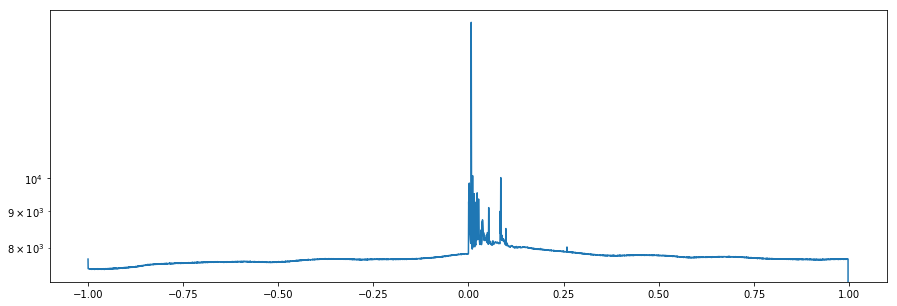

In [3]:

plt.figure(figsize=(15,5))
plt.plot(np.linspace(-0.999,0.999,6000),b)
plt.yscale('log')